# <font color='green'>**Seguridad En Ruta: Desglose de Incidentes Víales por C5 (2022-2023)**</font>





## **Introducción**

En el marco del Día Mundial en Recuerdo de las Víctimas de Accidentes de Tránsito, el Instituto Nacional de Estadística y Geografía (INEGI) ha revelado cifras impactantes acerca de la magnitud de los accidentes de tránsito en México durante el año 2021, en el comunicado de prensa titulado *'ESTADÍSTICAS A PROPÓSITO DEL DÍA MUNDIAL EN RECUERDO DE LAS VÍCTIMAS DE ACCIDENTES DE TRÁNSITO'* (*INEGI, 2022*) se reportó un un total de 340,415 incidentes reportados a nivel nacional, que resultaron en 3,849 vidas perdidas y 60,584 personas lesionadas. Lo anterior resalta la la urgencia de abordar la seguridad vial de manera contundente.  
<br>
En respuesta a este panorama, hemos dirigido nuestra atención hacia la Ciudad de México, utilizando como referencia los datos proporcionados por el Centro de Comando, Control, Cómputo, Comunicaciones y Contacto Ciudadano de la Ciudad de México (C5). Este órgano gubernamental se presenta como el canal principal, siendo el primero en recibir reportes de incidentes viales.   
<br>
El propósito de este proyecto es llevar a cabo un análisis exhaustivo de las características de los incidentes viales en la Ciudad de México, iluminando patrones, tendencias y áreas potenciales de mejora en seguridad vial. Con la información detallada proporcionada por el C5 y la SSC, buscamos contribuir a la implementación de estrategias y medidas efectivas que reduzcan la incidencia de accidentes y salvaguarden la vida de los ciudadanos en las vías de la ciudad.

## **Objetivo**

<font color='red'>Nota: Escribir objetivo</font>  
El dataset utilizado en el desarrollo de este proyecto, denominado **'Incidentes Viales (2022-2023)'**, fue obtenido del **'Portal de Datos Abiertos: Sistema Ajolote'** del Gobierno de la Ciudad de México. Se trata de un conjunto de datos proporcionados por el C5, que puede ser encontrado en el siguiente link:  
[Incidentes viales reportados por C5 ](https://datos.cdmx.gob.mx/dataset/incidentes-viales-c5)



## **Análisis Exploratorio**

### Librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats

### Carga de Datos

Para la carga de datos desde el dataset en formato CSV, se utiliza la función <font color='green'>**cargar_csv**</font>, la cual toma una URL como parámetro, asumiendo que el archivo CSV está alojado en la web, específicamente en un repositorio de GitHub. La función está diseñada con un bloque try/except: en el try, se asigna el resultado del método **read_csv** de la biblioteca Pandas a un objeto llamado df, y se imprime un mensaje indicando *'Carga de datos con éxito'*. En caso de que la operación no sea exitosa, se maneja la excepción y se imprime un mensaje de error.

Posterior a la carga del CSV, se imprimen los primeros 5 registros del DataFrame mediante el método **.head()**. En caso contrario, se imprime un mensaje de error.

In [2]:
def cargar_csv(url):
  try:
    df = pd.read_csv(url)
    print('Carga de datos con éxito.')
    return df
  except Exception as e:
    print(f'Error al leer el archivo CSV desde {url}: {e}');
    return None

In [3]:
url = 'https://raw.githubusercontent.com/DaniaGarciaM/SeguridadEnRuta-DS/main/inViales_2022_2023.csv'
df = cargar_csv(url)
df.head()

Carga de datos con éxito.


,folio,fecha_creacion,hora_creacion,dia_semana,fecha_cierre,hora_cierre,tipo_incidente_c4,incidente_c4,alcaldia_inicio,latitud,longitud,codigo_cierre,clas_con_f_alarma,tipo_entrada,alcaldia_cierre,colonia
0,C2C/20211229/00212,2021-12-29,23:21:20,Miércoles,2022-01-01,00:24:06,Lesionado,Atropellado,NaN,19.421610,-99.163670,I,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,NaN,ROMA NORTE I
1,C2C/20211231/00183,2021-12-31,23:48:03,Viernes,2022-01-01,06:29:52,Lesionado,Atropellado,CUAUHTEMOC,19.409910,-99.144270,A,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,CUAUHTEMOC,OBRERA III
2,C2C/20220101/00012,2022-01-01,01:06:39,Sábado,2022-01-01,06:00:12,Accidente,Choque con lesionados,CUAUHTEMOC,19.415250,-99.148320,A,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,CUAUHTEMOC,DOCTORES IV
3,C2C/20220101/00070,2022-01-01,09:51:53,Sábado,2022-01-01,12:54:10,Accidente,Motociclista,CUAUHTEMOC,19.443649,-99.165781,A,URGENCIAS MEDICAS,RADIO,CUAUHTEMOC,TLAXPANA
4,C2N/20211231/00128,2021-12-31,23:03:05,Viernes,2022-01-01,06:16:42,Accidente,Choque sin lesionados,IZTACALCO,19.414620,-99.060450,A,EMERGENCIA,BOTÓN DE AUXILIO,IZTACALCO,PANTITLAN II


### Análisis Exploratorio de Datos

In [4]:
def explorar_dataset(df):
  print(f'El DataFrame está conformado por {df.shape[1]} columnas y {df.shape[0]} registros en total')
  print()
  print(f'TIPOS DE DATOS')
  print(f'----------------------')
  print(df.dtypes)
  print(f'----------------------')


In [18]:
explorar_dataset(df)

El DataFrame está conformado por 16 columnas y 363372 registros en total

TIPOS DE DATOS
----------------------
folio                 object
fecha_creacion        object
hora_creacion         object
dia_semana            object
fecha_cierre          object
hora_cierre           object
tipo_incidente_c4     object
incidente_c4          object
alcaldia_inicio       object
latitud              float64
longitud             float64
codigo_cierre         object
clas_con_f_alarma     object
tipo_entrada          object
alcaldia_cierre       object
colonia               object
dtype: object
----------------------


En el apartado 'De la información contenida' del sitio donde se obtuvo el dataset, se menciona que los registros recibidos en el C5 se clasifican internamente mediante un código de cierre. Para contabilizar los incidentes considerados como 'reales', es decir, aquellos confirmados por las autoridades en el lugar de los hechos, se debe trabajar exclusivamente con los códigos de cierre etiquetados como 'Afirmativo'.  
Teniendo eso en cuenta, se procederá a eliminar todos aquellos registros que no hayan sido considerados como reales, en la columna *'codigo_cierre'*, empleando la función <font color='green'>**seleccionar_registros_por_codigo**</font>.

In [4]:
def seleccionar_registros_por_codigo(df, columna='codigo_cierre', valor_codigo='A'):
  try:
    df_total_registros = df.shape[0]
    df_filtrado = df[df[columna] == valor_codigo]
    df_total_filtrado = df_filtrado.shape[0]
    print(f'Después de filtrar los registros con código de cierre "{valor_codigo}", quedan {df_total_filtrado} de {df_total_registros} registros.')
    df_filtrado = df_filtrado.reset_index(drop=True)
    return df_filtrado
  except KeyError:
    print(f'Error: La columna "{columna}" no existe en el DataFrame.')
    return None


In [5]:
df_afirmativo = seleccionar_registros_por_codigo(df)
df_afirmativo.head()

Después de filtrar los registros con código de cierre "A", quedan 134741 de 363372 registros.


,folio,fecha_creacion,hora_creacion,dia_semana,fecha_cierre,hora_cierre,tipo_incidente_c4,incidente_c4,alcaldia_inicio,latitud,longitud,codigo_cierre,clas_con_f_alarma,tipo_entrada,alcaldia_cierre,colonia
0,C2C/20211231/00183,2021-12-31,23:48:03,Viernes,2022-01-01,06:29:52,Lesionado,Atropellado,CUAUHTEMOC,19.409910,-99.144270,A,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,CUAUHTEMOC,OBRERA III
1,C2C/20220101/00012,2022-01-01,01:06:39,Sábado,2022-01-01,06:00:12,Accidente,Choque con lesionados,CUAUHTEMOC,19.415250,-99.148320,A,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,CUAUHTEMOC,DOCTORES IV
2,C2C/20220101/00070,2022-01-01,09:51:53,Sábado,2022-01-01,12:54:10,Accidente,Motociclista,CUAUHTEMOC,19.443649,-99.165781,A,URGENCIAS MEDICAS,RADIO,CUAUHTEMOC,TLAXPANA
3,C2N/20211231/00128,2021-12-31,23:03:05,Viernes,2022-01-01,06:16:42,Accidente,Choque sin lesionados,IZTACALCO,19.414620,-99.060450,A,EMERGENCIA,BOTÓN DE AUXILIO,IZTACALCO,PANTITLAN II
4,C2N/20220101/00101,2022-01-01,09:56:54,Sábado,2022-01-01,13:04:08,Accidente,Choque sin lesionados,GUSTAVO A. MADERO,19.451630,-99.054690,A,EMERGENCIA,BOTÓN DE AUXILIO,GUSTAVO A. MADERO,C T M ARAGON (U)


Antes de sumergirnos en un análisis más profundo de nuestro conjunto de datos, es esencial abordar la presencia de valores faltantes o NaN. La función <font color='green'>**buscar_valores_faltantes**</font> realiza un análisis rápido del DataFrame proporcionado para identificar y contar la cantidad de valores faltantes en cada columna, generando otro DataFrame con la información. Utiliza el método **.isna()** para crear una matriz booleana indicando la presencia de valores nulos en el DataFrame y luego utiliza **.sum()** para contar la cantidad de True (valores nulos) en cada columna. El resultado es una serie que muestra la cantidad de valores faltantes por columna.

Luego, **la función filtra las columnas que contienen al menos un registro de tipo NaN**, asignándolas a una columna renombrada *'Total de faltantes'*. A continuación, crea otra columna llamada *'Porcentaje'*, donde se calcula cuánto representa la cantidad de valores faltantes en una columna con respecto al total de registros. La función redondea estos porcentajes a cuatro decimales.

In [6]:
def buscar_valores_faltantes(df):
  faltantes = pd.DataFrame(df.isna().sum(), columns=['nan'])
  faltantes = faltantes[faltantes['nan'] > 0]
  faltantes['Porcentaje'] = ((faltantes['nan'] / len(df)) * 100).round(4)
  faltantes = faltantes.rename(columns={'nan': 'Total de faltantes'})
  return faltantes

In [7]:
buscar_valores_faltantes(df_afirmativo)

,Total de faltantes,Porcentaje
alcaldia_inicio,2,0.0015
tipo_entrada,2,0.0015
alcaldia_cierre,2,0.0015
colonia,1361,1.0101


En la documentación del dataset, se especifica que cada incidente registrado genera un folio único como identificador, a excepción de las llamadas no procedentes o "falsas" (como bromas o niños jugando) que se reciben por diversos medios. Actualmente, estamos trabajando con el DataFrame *'df_afirmativo'*, el cual ha sido filtrado para incluir únicamente incidentes reales. En teoría, no deberíamos encontrar valores duplicados en la columna *'folio'*. No obstante, por precaución, utilizaremos la función <font color='green'>**'identificar_duplicados'**</font>, que crea una Serie booleana indicando si hay duplicados en la columna 'folio'. Si una fila tiene el mismo valor en la columna *'folio'* que una fila anterior, se marca como True. El DataFrame resultante, llamado **'duplicados'**, **contendrá todas las filas duplicadas en función del valor presente en la columna** **'folio'**.

In [8]:
def identificar_duplicados(df, columna='folio'):
  duplicados = df[df.duplicated(subset=[columna])]
  print(f'Hay {duplicados.shape[0]} registros duplicados')
  return duplicados

In [9]:
duplicados = identificar_duplicados(df_afirmativo)
duplicados

Hay 0 registros duplicados


,folio,fecha_creacion,hora_creacion,dia_semana,fecha_cierre,hora_cierre,tipo_incidente_c4,incidente_c4,alcaldia_inicio,latitud,longitud,codigo_cierre,clas_con_f_alarma,tipo_entrada,alcaldia_cierre,colonia


Con base a los objetivos del proyecto, no es necesario trabajar con todas las columnas del DataFrame, entonces se procederá a asignar al DataFrame solo las columnas a usar:

In [10]:
df_afirmativo = df_afirmativo[['fecha_creacion','hora_creacion','dia_semana','tipo_incidente_c4', 'incidente_c4', 'alcaldia_inicio', 'latitud', 'longitud', 'tipo_entrada']]
df_afirmativo.head()

,fecha_creacion,hora_creacion,dia_semana,tipo_incidente_c4,incidente_c4,alcaldia_inicio,latitud,longitud,tipo_entrada
0,2021-12-31,23:48:03,Viernes,Lesionado,Atropellado,CUAUHTEMOC,19.409910,-99.144270,BOTÓN DE AUXILIO
1,2022-01-01,01:06:39,Sábado,Accidente,Choque con lesionados,CUAUHTEMOC,19.415250,-99.148320,BOTÓN DE AUXILIO
2,2022-01-01,09:51:53,Sábado,Accidente,Motociclista,CUAUHTEMOC,19.443649,-99.165781,RADIO
3,2021-12-31,23:03:05,Viernes,Accidente,Choque sin lesionados,IZTACALCO,19.414620,-99.060450,BOTÓN DE AUXILIO
4,2022-01-01,09:56:54,Sábado,Accidente,Choque sin lesionados,GUSTAVO A. MADERO,19.451630,-99.054690,BOTÓN DE AUXILIO


Para facilitar el trabajo con las columnas del DataFrame, se procederá a renombrar los nombres de estas.

In [11]:
renombre_columnas = {
    'fecha_creacion' : 'fecha',
    'hora_creacion' : 'hora',
    'dia_semana' : 'dia',
    'tipo_incidente_c4' : 'tipo_incidente',
    'incidente_c4' : 'incidente',
    'alcaldia_inicio' : 'alcaldia',
    'latitud' : 'latitud',
    'longitud' : 'longitud',
    'tipo_entrada' : 'tipo_entrada'
}

In [12]:
df_afirmativo = df_afirmativo.rename(columns = renombre_columnas)
df_afirmativo.head()

,fecha,hora,dia,tipo_incidente,incidente,alcaldia,latitud,longitud,tipo_entrada
0,2021-12-31,23:48:03,Viernes,Lesionado,Atropellado,CUAUHTEMOC,19.409910,-99.144270,BOTÓN DE AUXILIO
1,2022-01-01,01:06:39,Sábado,Accidente,Choque con lesionados,CUAUHTEMOC,19.415250,-99.148320,BOTÓN DE AUXILIO
2,2022-01-01,09:51:53,Sábado,Accidente,Motociclista,CUAUHTEMOC,19.443649,-99.165781,RADIO
3,2021-12-31,23:03:05,Viernes,Accidente,Choque sin lesionados,IZTACALCO,19.414620,-99.060450,BOTÓN DE AUXILIO
4,2022-01-01,09:56:54,Sábado,Accidente,Choque sin lesionados,GUSTAVO A. MADERO,19.451630,-99.054690,BOTÓN DE AUXILIO


Con las adecuaciones realizadas, podemos observar que solo hay cuatro registros con valores NaN en dos columnas. Para asegurarnos de que el DataFrame quede limpio, eliminaremos esos registros de la muestra.

In [13]:
buscar_valores_faltantes(df_afirmativo)

,Total de faltantes,Porcentaje
alcaldia,2,0.0015
tipo_entrada,2,0.0015


In [14]:
df_afirmativo = df_afirmativo.dropna()
df_afirmativo = df_afirmativo.reset_index(drop=True)

In [15]:
buscar_valores_faltantes(df_afirmativo)

,Total de faltantes,Porcentaje


De igual manera, se cambiarán los tipos de datos de las columnas 'fecha' y 'hora' a tipo DateTime.

In [16]:
df_afirmativo['fecha'] = pd.to_datetime(df_afirmativo['fecha'])
df_afirmativo['hora'] = pd.to_datetime(df_afirmativo['hora'], format='%H:%M:%S').dt.time

In [17]:
df_afirmativo.head()

,fecha,hora,dia,tipo_incidente,incidente,alcaldia,latitud,longitud,tipo_entrada
0,2021-12-31,23:48:03,Viernes,Lesionado,Atropellado,CUAUHTEMOC,19.409910,-99.144270,BOTÓN DE AUXILIO
1,2022-01-01,01:06:39,Sábado,Accidente,Choque con lesionados,CUAUHTEMOC,19.415250,-99.148320,BOTÓN DE AUXILIO
2,2022-01-01,09:51:53,Sábado,Accidente,Motociclista,CUAUHTEMOC,19.443649,-99.165781,RADIO
3,2021-12-31,23:03:05,Viernes,Accidente,Choque sin lesionados,IZTACALCO,19.414620,-99.060450,BOTÓN DE AUXILIO
4,2022-01-01,09:56:54,Sábado,Accidente,Choque sin lesionados,GUSTAVO A. MADERO,19.451630,-99.054690,BOTÓN DE AUXILIO


In [18]:
explorar_dataset(df_afirmativo)

NameError: name 'explorar_dataset' is not defined

In [19]:
df_afirmativo.describe()

,fecha,latitud,longitud
count,134737,134737.000000,134737.000000
mean,2022-10-14 07:25:02.259958016,19.386065,-99.134994
min,2021-12-31 00:00:00,19.098213,-99.351060
25%,2022-05-27 00:00:00,19.338082,-99.174076
50%,2022-10-14 00:00:00,19.389116,-99.138387
75%,2023-02-28 00:00:00,19.437842,-99.095977
max,2023-07-31 00:00:00,19.579310,-98.947940
std,NaN,0.069833,0.060413


Después de haber realizado la limpieza y las modificaciones necesarias en el conjunto de datos original, se procederá a guardar la versión actualizada en un nuevo archivo CSV denominado **'inViales_2022_2023-clean.csv'**. Este paso resulta crucial para preservar las transformaciones realizadas y evitar tener que repetir el proceso de limpieza en cada sesión de trabajo. Al guardar los datos limpios en un nuevo archivo, se facilita el acceso y la manipulación de la versión actualizada del conjunto de datos sin perder las modificaciones efectuadas.

In [20]:
df_afirmativo.to_csv('inViales_2022_2023-clean.csv', index=False)


In [21]:
new_url = 'https://raw.githubusercontent.com/DaniaGarciaM/SeguridadEnRuta-DS/main/inViales_2022_2023-clean.csv'
df = cargar_csv(new_url)
df.head()

KeyboardInterrupt: 

## **Estimados de Locación y Variabilidad**

Medidas de Tendencia Central - Para identificar un valor que tiende a tipificar o a ser el más representativo de un conjunto de datos.  
Curva Sesgada a la derecha o sesgo positivo: La mayoría de las observaciones son debajo de la media  
Curva Sesgafa a la izquierda o sesgo negativo: La mayoría de las observaciones están por arriba de la media

In [5]:
explorar_dataset(df)

El DataFrame está conformado por 7 columnas y 134737 registros en total

TIPOS DE DATOS
----------------------
fecha             object
hora              object
dia               object
tipo_incidente    object
incidente         object
alcaldia          object
tipo_entrada      object
dtype: object
----------------------


In [6]:
df['fecha'] = pd.to_datetime(df['fecha'])
df['hora'] = pd.to_datetime(df['hora'])

C:\Users\dania\AppData\Local\Temp\ipykernel_12344\341787676.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hora'] = pd.to_datetime(df['hora'])


In [7]:
explorar_dataset(df)

El DataFrame está conformado por 7 columnas y 134737 registros en total

TIPOS DE DATOS
----------------------
fecha             datetime64[ns]
hora              datetime64[ns]
dia                       object
tipo_incidente            object
incidente                 object
alcaldia                  object
tipo_entrada              object
dtype: object
----------------------


In [8]:
df.head()

,fecha,hora,dia,tipo_incidente,incidente,alcaldia,tipo_entrada
0,2021-12-31,2024-02-05 23:48:03,Viernes,Lesionado,Atropellado,CUAUHTEMOC,BOTÓN DE AUXILIO
1,2022-01-01,2024-02-05 01:06:39,Sábado,Accidente,Choque con lesionados,CUAUHTEMOC,BOTÓN DE AUXILIO
2,2022-01-01,2024-02-05 09:51:53,Sábado,Accidente,Motociclista,CUAUHTEMOC,RADIO
3,2021-12-31,2024-02-05 23:03:05,Viernes,Accidente,Choque sin lesionados,IZTACALCO,BOTÓN DE AUXILIO
4,2022-01-01,2024-02-05 09:56:54,Sábado,Accidente,Choque sin lesionados,GUSTAVO A. MADERO,BOTÓN DE AUXILIO


In [16]:
def calcular_medidas_tendencia(df, columna):
  try:
    media = df[columna].mean()
    mediana = df[columna].median()
    moda = df[columna].mode()
    print(f'Respecto a la columna {columna}, las medidas de tendencia central son:')
    print('Media: {:}, \nMediana: {:}, \nModa: {:}'.format(media, mediana, moda))
    print(f'------------------')
    return media, mediana, moda
  except KeyError:
    print(f'Error: La columna {columna} no existe en el DataFrame.')

In [17]:
def calcular_medidas_columnas(df,columnas):
  resultados = {}
  for columna in columnas:
    media, mediana, moda = calcular_medidas_tendencia(df, columna)
    resultados[columna] = {'media': media, 'mediana': mediana, 'moda': moda}
  return resultados

In [18]:
columnas_medidas = ['fecha','hora']
resultados = calcular_medidas_columnas(df, columnas_medidas)

Respecto a la columna fecha, las medidas de tendencia central son:
Media: 2022-10-14 07:25:02.259958016, 
Mediana: 2022-10-14 00:00:00, 
Moda: 0   2022-10-29
Name: fecha, dtype: datetime64[ns]
------------------
Respecto a la columna hora, las medidas de tendencia central son:
Media: 2024-02-05 14:03:31.347691776, 
Mediana: 2024-02-05 14:49:49, 
Moda: 0   2024-02-05 16:01:46
1   2024-02-05 17:48:04
2   2024-02-05 19:32:15
3   2024-02-05 22:03:25
Name: hora, dtype: datetime64[ns]
------------------


In [19]:
def graficar_distribucion(df, columna):
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    sns.histplot(df[columna], kde=True, bins=12, color='blue')
    plt.axvline(resultados[columna]['media'], color='red', linestyle='--', label=f'Media: {resultados[columna]["media"]}')
    plt.axvline(resultados[columna]['mediana'], color='green', linestyle='-', label=f'Mediana: {resultados[columna]["mediana"]}')
    plt.axvline(resultados[columna]['moda'], color='purple', linestyle='-.', label=f'Moda: {resultados[columna]["moda"]}')
    
    # moda_values = resultados[columna]['moda']
    # if len(moda_values) > 0:
    #     # Tomamos el primer valor de la moda (si hay varios)
    #     moda_value = moda_values.iloc[0]
    #     plt.axvline(moda_value, color='purple', linestyle='-.', label=f'Moda: {moda_value}')
    
    plt.title(f'Distribución de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.show()


In [20]:
def graficar_distribucion_columnas(df,columnas):
  calcular_medidas_columnas(df, columnas)
  for columna in columnas:
    graficar_distribucion(df,columna)

Respecto a la columna fecha, las medidas de tendencia central son:
Media: 2022-10-14 07:25:02.259958016, 
Mediana: 2022-10-14 00:00:00, 
Moda: 0   2022-10-29
Name: fecha, dtype: datetime64[ns]
------------------


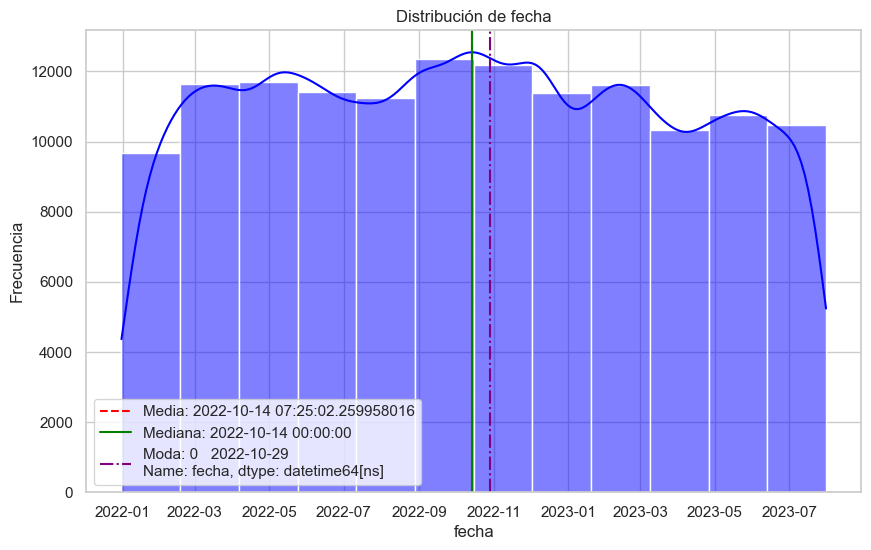

In [21]:
graficar_distribucion_columnas(df,['fecha'])